In [2]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
df = pd.read_csv('Desktop/new-york-city-taxi-fare-prediction/train.csv', nrows = 1_000_000)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


Let's check out what kind of data these are.

In [3]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

It looks like the key and pickup_datetime are the same so I will delete one 

In [4]:
df = df.drop('pickup_datetime',axis=1)
df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
print(df.shape)

(1000000, 7)


I'll also print out some summary statistics

In [16]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,total_distance
count,994258.000000,994258.000000,994258.000000,994258.000000,994258.000000,994258.000000,994258.000000,994258.000000,994258.000000
mean,11.322223,-72.582792,39.958959,-72.581904,39.959282,1.690800,0.022498,0.021080,0.035388
std,9.514120,10.168132,5.986795,10.168015,5.986819,1.306155,0.038087,0.027638,0.045541
min,2.500000,-121.391210,-74.016587,-121.391248,-74.035197,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992071,40.735032,-73.991392,40.734104,1.000000,0.005793,0.006582,0.010734
50%,8.500000,-73.981811,40.752725,-73.980158,40.753192,1.000000,0.012423,0.013836,0.023186
75%,12.500000,-73.967160,40.767170,-73.963735,40.768140,2.000000,0.023611,0.026817,0.046089
max,130.000000,40.850357,51.084373,40.851027,51.346519,6.000000,4.923874,3.820613,5.941147


# Cleaning up data
I'd like to clean this data up in terms of Lat/Long, Fare price and passenger count

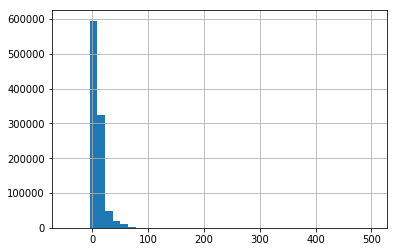

In [7]:
df.fare_amount.hist(bins=40)

## Taxi Fare 
Real NYC taxi base fare is 2.5 so I will remove points below here as well as any high outliers above 130

In [8]:
print("Old: %d" % len(df))
df = df[df['fare_amount'].between(left=2.5, right=130)]
df = df[df['passenger_count'].between(left=1, right=6)]
print("New: %d" % len(df))

Old: 1000000
New: 996184


## Passenger Count
How is it distributed?
Does it impact fare prices?

AttributeError: 'method' object has no attribute 'labelx'

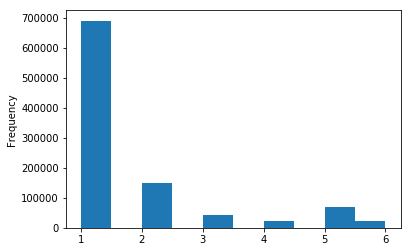

In [31]:
fig1 = df.passenger_count.plot.hist()
fig1.plot.labelx = "Number of Passengers"

## Distance
Can we visualize the distance and fare price relationship? Is it correlated?

In [10]:
df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
df['total_distance'] = ((df.dropoff_longitude - df.pickup_longitude)+(df.dropoff_latitude - df.pickup_latitude)).abs()


In [11]:
df = df[(df.abs_diff_longitude < 5.0) & (df.abs_diff_latitude < 5.0)]

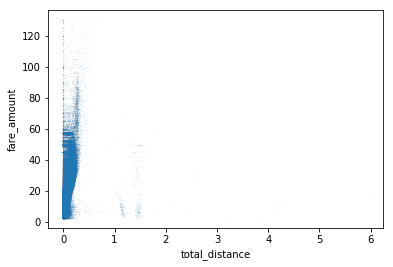

In [30]:
fig2 = df.plot.scatter(x='total_distance', y='fare_amount', s =0.001)

There seems to be a correlation but it's quite hard to see here so I will find the correlation value

In [14]:
df['fare_amount'].corr(df['total_distance'])
df.corr() 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,total_distance
fare_amount,1.000000,0.006443,-0.006223,0.006085,-0.006178,0.013290,0.710227,0.551151,0.567640
pickup_longitude,0.006443,1.000000,-0.982147,0.999991,-0.982146,-0.000784,-0.075514,-0.098202,-0.100500
pickup_latitude,-0.006223,-0.982147,1.000000,-0.982149,0.999983,-0.000434,0.071967,0.091385,0.095171
dropoff_longitude,0.006085,0.999991,-0.982149,1.000000,-0.982146,-0.000790,-0.075869,-0.098520,-0.100724
dropoff_latitude,-0.006178,-0.982146,0.999983,-0.982146,1.000000,-0.000422,0.072090,0.091541,0.095141
passenger_count,0.013290,-0.000784,-0.000434,-0.000790,-0.000422,1.000000,0.007191,0.006315,0.004183
abs_diff_longitude,0.710227,-0.075514,0.071967,-0.075869,0.072090,0.007191,1.000000,0.508976,0.748567
abs_diff_latitude,0.551151,-0.098202,0.091385,-0.098520,0.091541,0.006315,0.508976,1.000000,0.706971
total_distance,0.567640,-0.100500,0.095171,-0.100724,0.095141,0.004183,0.748567,0.706971,1.000000


Looks like there is a pretty good correlation of .56 so this could be a good predictor of fare amount

In [22]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,total_distance
count,994258.000000,994258.000000,994258.000000,994258.000000,994258.000000,994258.000000,994258.000000,994258.000000,994258.000000
mean,11.322223,-72.582792,39.958959,-72.581904,39.959282,1.690800,0.022498,0.021080,0.035388
std,9.514120,10.168132,5.986795,10.168015,5.986819,1.306155,0.038087,0.027638,0.045541
min,2.500000,-121.391210,-74.016587,-121.391248,-74.035197,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992071,40.735032,-73.991392,40.734104,1.000000,0.005793,0.006582,0.010734
50%,8.500000,-73.981811,40.752725,-73.980158,40.753192,1.000000,0.012423,0.013836,0.023186
75%,12.500000,-73.967160,40.767170,-73.963735,40.768140,2.000000,0.023611,0.026817,0.046089
max,130.000000,40.850357,51.084373,40.851027,51.346519,6.000000,4.923874,3.820613,5.941147


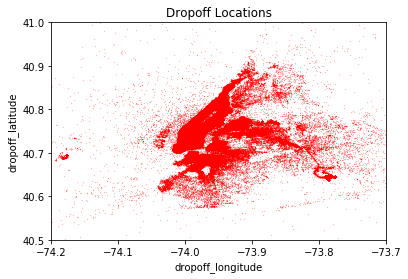

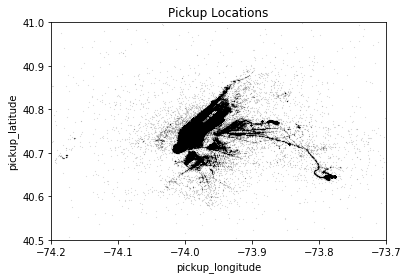

In [26]:
import matplotlib.pyplot as plt
lat_border = (40.5, 41.0) 
long_border = (-74.2, -73.7)
df.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude', color='red', s=.01)
plt.title("Dropoff Locations")
plt.ylim(lat_border)
plt.xlim(long_border)

df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude', color='black', s=.01, alpha=.5)
plt.title("Pickup Locations")
plt.ylim(lat_border)
plt.xlim(long_border)
plt.show()

It looks like many of the pickups are more centralized while dropoffs converge less 